In [47]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [48]:
Fashion_MNIST = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = Fashion_MNIST.load_data()

In [49]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train.shape

(60000, 28, 28)

In [50]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
x_train.shape

(60000, 28, 28, 1)

In [51]:
num_classes = len(set(y_train))
print(num_classes)

10


In [55]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', strides=2)(i)
x = Conv2D(64, (3, 3), activation='relu', strides=2)(x)
x = Conv2D(128, (3, 3), activation='relu', strides=2)(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(num_classes, activation='softmax')(x)

model = Model(i, x)

In [56]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 18ms/step - accuracy: 0.7447 - loss: 0.6997 - val_accuracy: 0.8478 - val_loss: 0.3965
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.8571 - loss: 0.3749 - val_accuracy: 0.8656 - val_loss: 0.3526
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.8788 - loss: 0.3188 - val_accuracy: 0.8805 - val_loss: 0.3256
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 17ms/step - accuracy: 0.8934 - loss: 0.2800 - val_accuracy: 0.8838 - val_loss: 0.3239
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9020 - loss: 0.2524 - val_accuracy: 0.8916 - val_loss: 0.2975
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9111 - loss: 0.2283 - val_accuracy: 0.8930 - val_loss: 0.2971
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9206 - loss: 0.2082 - val_accuracy: 0.8944 - val_loss: 0.2959
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9277 -

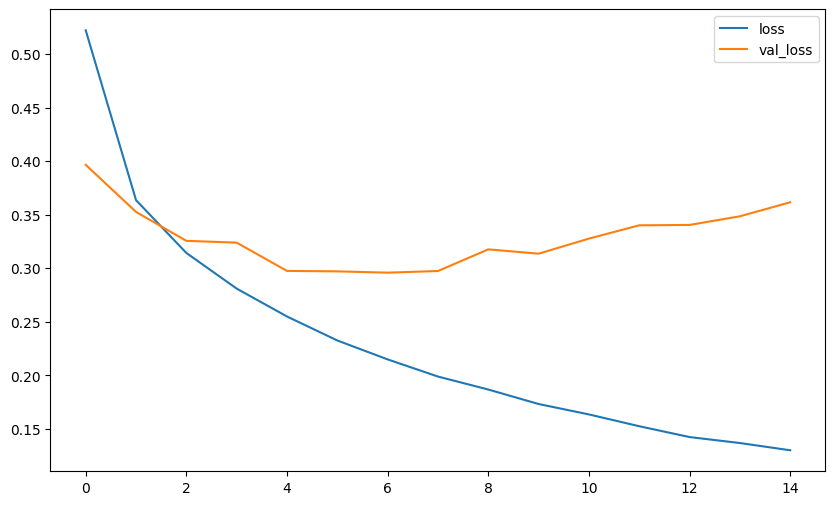

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

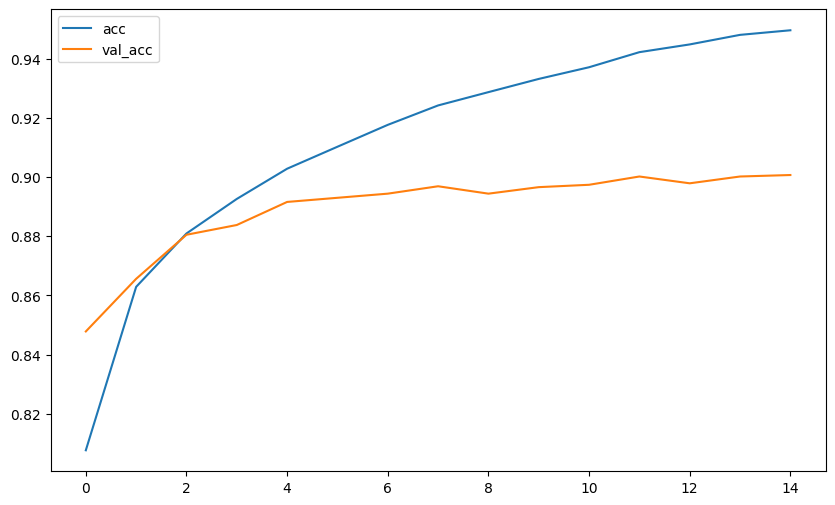

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [59]:
a = model.evaluate(x_test, y_test)
print(a)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8990 - loss: 0.3797
[0.36154261231422424, 0.9006999731063843]


In [70]:
x_train[0].shape

(28, 28, 1)

In [71]:
x_train.shape[0]

60000

In [83]:
pred = model.predict(x_test).argmax(axis=1)
pred.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


(10000,)

In [86]:
labels = '''T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot'''.split(',')

In [101]:
y = np.where(pred != y_test)

Text(0.5, 1.0, 'True Lable: Bag  Predicted: Shirt')

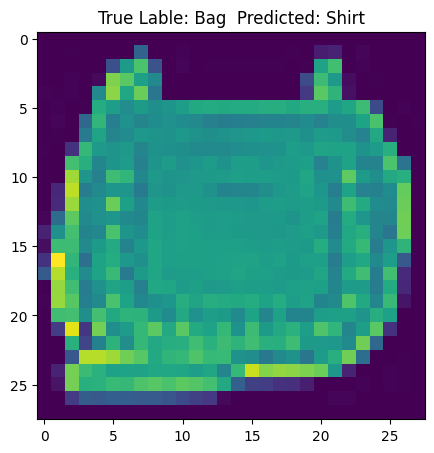

In [104]:
i = np.random.choice(y[0])
plt.figure(figsize=(5,6))
plt.imshow(x_test[i])
plt.title("True Lable:%s  Predicted:%s" % (labels[y_test[i]], labels[pred[i]]))